# 1st Order Transfer function in transfer function

* ZOH
* Delay transfer function
* 1st order filter transfer funciton
* 2nd order transfer function
* 

1st Order Transfer function  is $TF=\frac{\tau}{s+\tau}$  


In [8]:
import sympy as sym
sym.init_printing() # enables pretty printing for formulas

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Control 1st Order simulation

In [9]:


import matplotlib.pyplot as plt
# %matplotlib inline
%config InlineBackend.figure_format = 'retina'
# svg retina

from sympy.physics.control.lti import TransferFunction

from sympy.physics.control.control_plots import pole_zero_plot
# from sympy.physics.control.control_plots import step_response_plot
# from sympy.physics.control.control_plots import step_response_numerical_data

from sympy.physics.control.control_plots import bode_plot
# from sympy.physics.control.control_plots import bode_phase_numerical_data
# from sympy.physics.control.control_plots import bode_magnitude_numerical_data
from sympy.physics.control.control_plots import impulse_response_plot
from sympy.physics.control.control_plots import step_response_plot
from sympy.physics.control.control_plots import ramp_response_plot
# from sympy.physics.control.control_plots import ramp_response_numerical_data
from sympy.abc import s
import numpy as np
import control as ct


In [10]:
t_s=0.1
num=[t_s]
den=[1,t_s]
G=ct.tf(num,den)
G


TransferFunction(array([0.1]), array([1. , 0.1]))

### CT plot delay

#### Bode

phase delay at $1/t$ is $45\deg$

<AxesSubplot: label='control-bode-magnitude', ylabel='Magnitude'>

<AxesSubplot: label='control-bode-phase', xlabel='Frequency (rad/sec)', ylabel='Phase (deg)'>

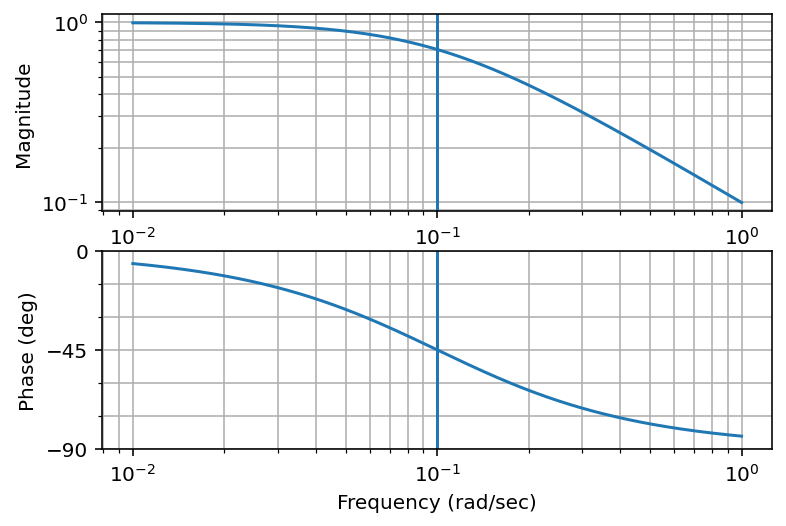

In [14]:
# bode=ct.bode_plot(G)
fig = plt.figure()
mag,phase,omega=ct.bode(G, plot=True)
allaxes = fig.get_axes()
allaxes[0]
allaxes[1]
allaxes[0].axvline(t_s)
# allaxes[0].axhline(20*np.log10(3))
allaxes[1].axvline(t_s)
# allaxes[1].axhline(-45)



#### Step reponse

array([], shape=(0, 1), dtype=int64)

array([], shape=(0, 1), dtype=float64)

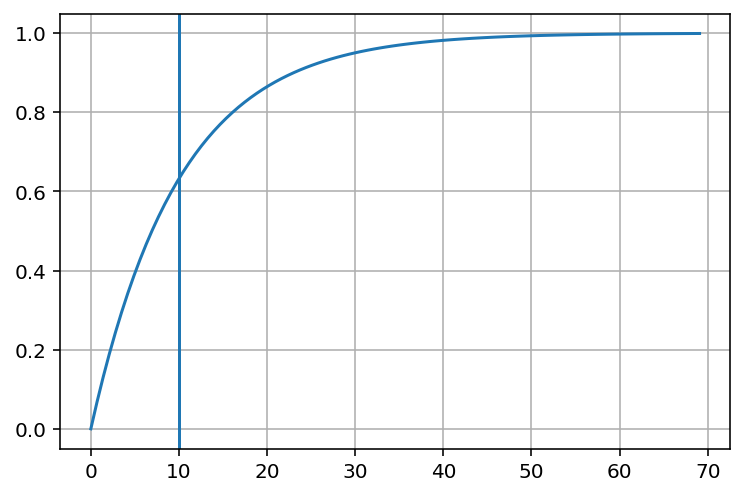

In [24]:
t,step=ct.step_response(G)
plt.plot(t,step)
plt.axvline(1/t_s)
plt.grid()

t1=1/t_s
t_index = np.argwhere(t == t1)
t_index
step[t_index]
plt.show()

#### Output reponse to sin wave

We can see the output sin compare to input sin delay time is $t_s$

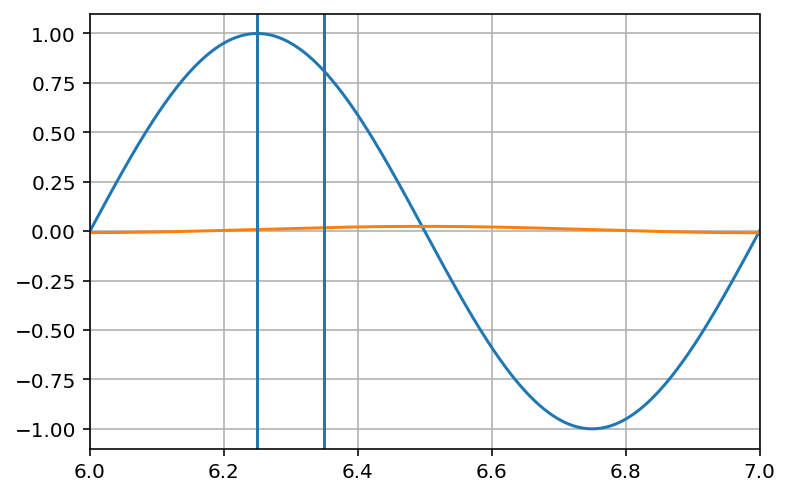

In [12]:
# set up simulation time
t_start=0
t_stop=10
t_step=0.001
t_lim_left=6
t_lim_right=7
t_axvline=6.25
# t_number=1000
# t1=np.linspace(t_start,t_stop,t_number)
# t1
# setup simulation input signal
freq=1
t=np.arange(t_start,t_stop,t_step)
sin=np.sin(2*np.pi*freq*t)
plt.plot(t,sin)

# plt.grid(True)
# plt.show()
# Calculation transfer response
T, yout = ct.forced_response(G, t, sin, 0)
# t,y=ct.input_output_response(G,t,sin,0)
plt.plot(T,yout)
plt.axvline(t_axvline)
plt.axvline(t_axvline+t_s)
plt.xlim(t_lim_left,t_lim_right)

plt.grid(True)
# add a ; to avoid <matplotlib.lines.Line2D> show in jupyter
plt.show();

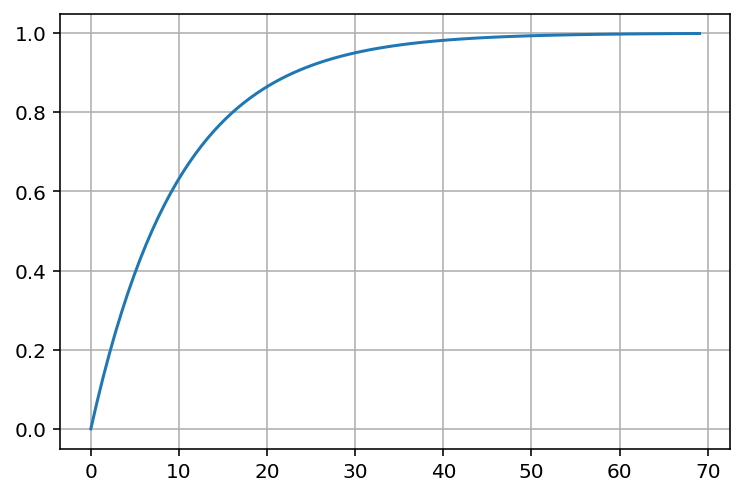

In [13]:
t_end=10
t_delta=0.01

t,y=ct.step_response(G)
plt.plot(t,y)
plt.grid()
plt.show()

## Scipy Delay simulation

## 1st order filter simulation

Transfer function of a 1st order filter is  

$TF= \frac{1}{s+T_{s}}$  